# MPS using G2S

The documentation of G2S is on https://github.com/GAIA-UNIL/G2S

The GitHub of G2S is on https://gaia-unil.github.io//G2S/briefOverview.html
    

# Note: Before import the packages and run the codes, you need to run the G2S server. Simply run 'g2s server' in a terminal within the same environment to launch the server

In [7]:
##### This code requires the G2S server to be running

import numpy as np
from PIL import Image
import requests
from io import BytesIO
from g2s import g2s
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os
import pandas as pd


# Data and result paths

In [1]:
# Path of training image
data_dir = '3_5_0_MPS_Training_images/'
TI_name='Uncond_Channel_TI_QS.txt'

# Path of saving the simulation results
saved_sim_dir='Saved_sim_dir/Quick_sampling/'


# Simulation setup

In [2]:
nreal=100 # Number of realizations

# Set the target shape of output realizations
target_shape=(64,64)

# Setting the Parameters in DS for different combinations
nneighbor_list=[5, 10, 15, 20] #[10, 20, 30, 40, 50]
k_list=[1, 3, 5]

# Load the training image

In [4]:
TI=np.loadtxt(data_dir+TI_name, delimiter=',', dtype=int)

In [5]:
TI.shape

(200, 200)

# TI

Text(0.5, 1.0, 'TI')

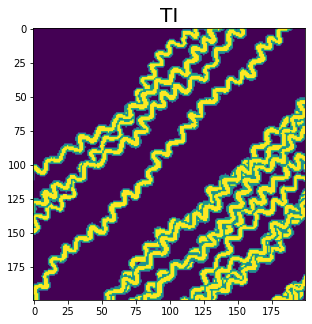

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(TI)
plt.title('TI',fontsize=20)

# Unconditional simulation with different n and k 

In [12]:
run_time=[] # save the run time for each job
parameter_name=[] # Combination of different parameters

process_index=0
total_n_jobs=len(nneighbor_list)*len(k_list)

for nneighbor in nneighbor_list:
    for k in k_list:
        
        start_time = time.time() # start time
        
        process_index=process_index+1
        print('Current jobs: %d/%d'%(process_index,total_n_jobs))
       
        # Run simulation
        ids=np.empty((nreal,));
        for i in range(nreal):
            ids[i]=g2s('-a','qs',
                       '-ti',TI, # Training image
                       '-di',np.zeros(target_shape)*np.nan, # Destination image
                       '-dt',[1], # 0 → continuous and 1 → categorical.
                       '-k',k, # Number of best candidates to consider ∈ [1 ∞].
                       '-n',nneighbor, # N closest neighbors to consider. 
                       '-j',0.8, # Percentage of logical cores here 80%
                       '-s',i, # Random seed value.
                       '-submitOnly');
            
        # Retrieve the realization
        sims=np.empty((target_shape[0],target_shape[1],nreal));
        for i in range(nreal):
            sims[:,:,i],*_=g2s('-waitAndDownload',ids[i]);
        
        # Save simulations in the corresponding folders. The folder name is the combination of paramters
        new_folder='n_%d_k_%d'%(nneighbor,k)
        new_folder_path=saved_sim_dir+new_folder
        os.makedirs(new_folder_path)
        for i in range(nreal):
            plt.imsave(new_folder_path+'/'+'%d.png'%i,sims[:,:,i],cmap='viridis')


        np.save(new_folder_path+'/'+'all_sim_results.npy',sims)

        # Calculate the runtime
        end_time = time.time()
        elapsed_time = end_time - start_time
        print("Elapsed time:", elapsed_time, "seconds")    
        run_time.append(elapsed_time)
        parameter_name.append(new_folder)

# Save the runtimes of each paramter combination into a csv file
parameters_time={'parameters':parameter_name,'Runtime (s)':run_time}
parameters_time=pd.DataFrame(parameters_time)
parameters_time.to_csv(saved_sim_dir+'parameters_runtime.csv', index=False)    


Current jobs: 1/12
job Id is: 1196090924
job Id is: 1244056882
job Id is: 1292156466
job Id is: 1339276507
job Id is: 1386547924
job Id is: 1433828466
job Id is: 1480746049
job Id is: 1531779132
job Id is: 1579428591
job Id is: 1626597674
job Id is: 1673073924
job Id is: 1720104007
job Id is: 1771433174
job Id is: 1820729507
job Id is: 1870425049
job Id is: 1920032841
job Id is: 1969003424
job Id is: 2004285132
job Id is: 2053293632
job Id is: 2102731507
job Id is: 2150448049
job Id is: 2210546716
job Id is: 2302839007
job Id is: 2340370882
job Id is: 2391530966
job Id is: 2437930966
job Id is: 2488707549
job Id is: 2537313174
job Id is: 2586757007
job Id is: 2636693257
job Id is: 2684285049
job Id is: 2730597174
job Id is: 2779200507
job Id is: 2826858382
job Id is: 2876923216
job Id is: 2923924132
job Id is: 2971878091
job Id is: 3020808132
job Id is: 3065539424
job Id is: 3112574299
job Id is: 3159980299
job Id is: 3207340007
job Id is: 3253711632
job Id is: 3302431341
job Id is: 33

progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       


ERROR:tornado.application:Exception in callback functools.partial(<bound method OutStream._flush of <ipykernel.iostream.OutStream object at 0x10452c1f0>>)
Traceback (most recent call last):
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9/site-packages/ipykernel/iostream.py", line 513, in _flush
    self.session.send(
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9/site-packages/jupyter_client/session.py", line 842, in send
    to_send = self.serialize(msg, ident)
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9/site-packages/jupyter_client/session.py", line 716, in serialize
    content = self.pack(content)
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9/site-packages/jupyter_client/session.py", line 97, in json_packer
    return json.dumps(
  File "/Users/jiayuan/miniforge3/envs/JimEnv/lib/python3.9

progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
        Elapsed time: 29.18087887763977 seconds
Current jobs: 5/12
job Id is: 3386244728
job Id is: 3429509520
job Id is: 3477642978
job Id is: 3527254686
job Id is: 3574247520
job Id is: 3622335228
job Id is: 3675038186
job Id is: 3765049978
job Id is: 3850428811
job Id is: 3901370020
job Id is: 3947288561
job Id is: 3996187061
job Id is: 4044635436
job Id is: 4092129311
job Id is: 4139558811
job Id is: 4188904186
job Id is: 4236452353
job Id is: 4285988436
job Id is: 37623765
job Id is: 84777557
job Id is: 130025849
job Id is: 178863932
job Id is: 231709849
job Id is: 280163932
job Id is: 326901390
job Id is: 375397182
job Id is: 423285182


progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
        Elapsed time: 28.64802098274231 seconds
Current jobs: 7/12
job Id is: 3675810634
job Id is: 3721339718
job Id is: 3767172634
job Id is: 3814303759
job Id is: 3862104676
job Id is: 3912189218
job Id is: 3961757968
job Id is: 4008077009
job Id is: 4053063134
job Id is: 4101655218
job Id is: 41

progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 13.670%        Elapsed time: 21.713635206222534 seconds
Current jobs: 9/12
job Id is: 3314794207
job Id is: 33609617

progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       


progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
progress 100.000%       
